<a href="https://colab.research.google.com/github/JessePMelo/TelecomX_Regressao_Machine/blob/main/TelecomX_Regressao_machine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Regressão Linear -  Oracle Next Education G8 - Data Science


## Sumário  

- Objetivo  
- Carga e Inspeção de Dados  
- Pré-Processamento  
- Modelagem  
- Avaliação  
- Conclusões

###Objetivo

Este projeto visa prever cancelamentos de clientes de telecom usando Regressão Logística e Random Forest, comparando seus desempenhos em métricas de classificação.




###Carga e Inspeção de dados

####Carga de dados

Importar todas bibliotecas

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing  import StandardScaler, OneHotEncoder
from sklearn.linear_model   import LogisticRegression
from sklearn.ensemble       import RandomForestClassifier
from sklearn.metrics        import (
    confusion_matrix,
    classification_report,
    roc_auc_score,
    precision_recall_curve,
    roc_curve,
    auc
)
from imblearn.over_sampling import SMOTE



O arquivo esta em formato comma separated values (CSV), por isso foi utilizado uma função do pandas pandas_csv.

In [44]:
dados = pd.read_csv('https://raw.githubusercontent.com/JessePMelo/TelecomX_Regressao_Machine/refs/heads/main/dados_normalizados.csv')

####Inspeção do DF

Analise da estrutura dos dados colunas e linhas.

In [45]:
dados.head(5)

,ID_Cliente,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,...,Backup_Online,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


A coluna ID_Cliente são apenas identificadores unicos (ID) e não tem necessidade de permanecer no projeto.

In [46]:
dados = dados.drop('ID_Cliente', axis=1)

Inspeção do DF

Conferindo nomes das colunas, tamanho do DF e quais os tipos de dados as colunas contem.

In [47]:
dados.head(5)

,Cancelou,Genero,Idoso,Possui_Conjuge,Possui_Dependentes,Meses_Contrato,Telefone_Ativo,Multiplas_Linhas,Tipo_Internet,Seguranca_Online,Backup_Online,Protecao_Aparelho,Suporte_Tecnico,Streaming_TV,Streaming_Filmes,Tipo_Contrato,Fatura_Papel,Metodo_Pagamento,Cobranca_Mensal,Cobranca_Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
dados.columns

Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Papel', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total'],
      dtype='object')

In [49]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cancelou            7043 non-null   object 
 1   Genero              7267 non-null   object 
 2   Idoso               7267 non-null   int64  
 3   Possui_Conjuge      7267 non-null   object 
 4   Possui_Dependentes  7267 non-null   object 
 5   Meses_Contrato      7267 non-null   int64  
 6   Telefone_Ativo      7267 non-null   object 
 7   Multiplas_Linhas    7267 non-null   object 
 8   Tipo_Internet       7267 non-null   object 
 9   Seguranca_Online    7267 non-null   object 
 10  Backup_Online       7267 non-null   object 
 11  Protecao_Aparelho   7267 non-null   object 
 12  Suporte_Tecnico     7267 non-null   object 
 13  Streaming_TV        7267 non-null   object 
 14  Streaming_Filmes    7267 non-null   object 
 15  Tipo_Contrato       7267 non-null   object 
 16  Fatura

###Pré-Processamento

Modelos não conseguem lidar com o tipo object (texto) é necessário converter as colunas de strings para numeros. Foi escolhido o metodo de codificação ONE HOT ENCODING.

In [50]:

# Colunas categóricas que serão codificadas
colunas_para_codificar = [
    'Cancelou', 'Genero', 'Possui_Conjuge', 'Possui_Dependentes',
    'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet', 'Seguranca_Online',
    'Backup_Online', 'Protecao_Aparelho', 'Suporte_Tecnico', 'Streaming_TV',
    'Streaming_Filmes', 'Tipo_Contrato', 'Fatura_Papel', 'Metodo_Pagamento'
]

# Cria o codificador One-Hot, removendo a primeira categoria de cada variável
codificador_ohe = OneHotEncoder(
    drop='first',
    sparse_output=False,
    dtype=int,
    handle_unknown='ignore'
)

# Define o ColumnTransformer para aplicar o OHE só nas colunas desejadas
transformador = ColumnTransformer(
    transformers=[
        ('onehot', codificador_ohe, colunas_para_codificar)
    ],
    remainder='passthrough'  # mantém as demais colunas sem alteração
)

# Supondo que seu DataFrame original chama-se df
df = dados.copy()

#Ajusta (fit) e transforma os dados
dados_transformados = transformador.fit_transform(df)

#Recupera os nomes das colunas OHE geradas
nomes_ohe = transformador.named_transformers_['onehot'].get_feature_names_out(colunas_para_codificar)

#Monta o DataFrame final, unindo colunas transformadas e não-transformadas
df_codificado = pd.DataFrame(
    dados_transformados,
    columns=[*nomes_ohe, *[c for c in df.columns if c not in colunas_para_codificar]]
)


Como os dados ficaram apos colunas serem decodificadas.

In [51]:
df_codificado.head(2)

,Cancelou_Yes,Cancelou_nan,Genero_Male,Possui_Conjuge_Yes,Possui_Dependentes_Yes,Telefone_Ativo_Yes,Multiplas_Linhas_No phone service,Multiplas_Linhas_Yes,Tipo_Internet_Fiber optic,Tipo_Internet_No,...,Tipo_Contrato_One year,Tipo_Contrato_Two year,Fatura_Papel_Yes,Metodo_Pagamento_Credit card (automatic),Metodo_Pagamento_Electronic check,Metodo_Pagamento_Mailed check,Idoso,Meses_Contrato,Cobranca_Mensal,Cobranca_Total
0,0,0,0,1,1,1,0,0,0,0,...,1,0,1,0,0,1,0,9,65.6,593.3
1,0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,1,0,9,59.9,542.4


As colunas 'Cancelou_Yes' e 'Cancelou_nan' dizem a mesma coisa de maneira inversa, e como o estudo é para retenção de clientes que tem maior chance de cancelar, decidi excluir a coluna 'Cancelou_nan'.

In [52]:
df_codificado = df_codificado.drop('Cancelou_nan', axis = 1)

Analisando toda a estrutura de dados do df mais uma vez.

In [53]:
df_codificado.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 31 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   Cancelou_Yes                              7267 non-null   object
 1   Genero_Male                               7267 non-null   object
 2   Possui_Conjuge_Yes                        7267 non-null   object
 3   Possui_Dependentes_Yes                    7267 non-null   object
 4   Telefone_Ativo_Yes                        7267 non-null   object
 5   Multiplas_Linhas_No phone service         7267 non-null   object
 6   Multiplas_Linhas_Yes                      7267 non-null   object
 7   Tipo_Internet_Fiber optic                 7267 non-null   object
 8   Tipo_Internet_No                          7267 non-null   object
 9   Seguranca_Online_No internet service      7267 non-null   object
 10  Seguranca_Online_Yes                      7267 n

####Conversão de Dados para Regressão

Para aplicar modelos de regressão, é necessário que todas as variáveis estejam no formato numérico. No entanto, após o processo de codificação, algumas colunas estavam no tipo object, o que inviabiliza o uso direto em algoritmos de machine learning.

Durante a conversão explícita dessas colunas para o tipo float, foi identificado que a coluna Cobrança_Total continha valores vazios ou em branco. Para resolver isso de forma simples e manter a consistência dos dados, os valores ausentes foram preenchidos com zero (0).

A escolha do tipo float se deu porque ele é capaz de representar tanto números inteiros quanto decimais, cobrindo com segurança qualquer valor original da base.

In [54]:
df_codificado['Cobranca_Total'].replace('', '0', inplace=True)
df_codificado['Cobranca_Total'].replace(' ', '0', inplace=True)
df_codificado = df_codificado.astype(float)

/tmp/ipython-input-1864102336.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_codificado['Cobranca_Total'].replace('', '0', inplace=True)
/tmp/ipython-input-1864102336.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

Por segurança confirmei se tudo que tinha antes permaneceu depois do tratamento.

In [55]:
print(dados.columns,'\n' ,df_codificado.columns)

Index(['Cancelou', 'Genero', 'Idoso', 'Possui_Conjuge', 'Possui_Dependentes',
       'Meses_Contrato', 'Telefone_Ativo', 'Multiplas_Linhas', 'Tipo_Internet',
       'Seguranca_Online', 'Backup_Online', 'Protecao_Aparelho',
       'Suporte_Tecnico', 'Streaming_TV', 'Streaming_Filmes', 'Tipo_Contrato',
       'Fatura_Papel', 'Metodo_Pagamento', 'Cobranca_Mensal',
       'Cobranca_Total'],
      dtype='object') 
 Index(['Cancelou_Yes', 'Genero_Male', 'Possui_Conjuge_Yes',
       'Possui_Dependentes_Yes', 'Telefone_Ativo_Yes',
       'Multiplas_Linhas_No phone service', 'Multiplas_Linhas_Yes',
       'Tipo_Internet_Fiber optic', 'Tipo_Internet_No',
       'Seguranca_Online_No internet service', 'Seguranca_Online_Yes',
       'Backup_Online_No internet service', 'Backup_Online_Yes',
       'Protecao_Aparelho_No internet service', 'Protecao_Aparelho_Yes',
       'Suporte_Tecnico_No internet service', 'Suporte_Tecnico_Yes',
       'Streaming_TV_No internet service', 'Streaming_TV_Yes',
      

Com o One Hot Encoding foram criadas algumas colunas que não teriam utilidades no projeto e foram apagadas.

In [56]:
colunas_apagar = [
    'Multiplas_Linhas_No phone service',
    'Seguranca_Online_No internet service',
    'Backup_Online_No internet service',
    'Protecao_Aparelho_No internet service',
    'Suporte_Tecnico_No internet service',
    'Streaming_TV_No internet service',
    'Streaming_Filmes_No internet service'
]

df_codificado.drop(columns=colunas_apagar, inplace=True)

####Definição da Variável Alvo

Modelos de regressão e classificação exigem que a variável alvo esteja separada do conjunto de atributos. No contexto deste projeto, a coluna Cancelou_Yes representa os clientes que cancelaram o serviço (classe 1). Para facilitar a leitura e padronizar o nome, essa coluna foi renomeada para Cancelou.

Após essa renomeação, a variável alvo foi isolada em um novo objeto (y), e a coluna correspondente foi removida do DataFrame principal, garantindo a estrutura necessária para o treinamento dos modelos.



In [57]:

variavel_alvo = df_codificado['Cancelou_Yes'].reset_index(drop=True)
variavel_alvo = pd.DataFrame(variavel_alvo)

variavel_alvo = variavel_alvo.rename(columns={
    'Cancelou_Yes':                         'Cancelou'})
df_codificado = df_codificado.drop('Cancelou_Yes',axis=1)

Para facilitar o entendimento achei melhor renomear as colunas e atribui essas modificações a uma nova variavel chamada apenas df.

In [58]:
df = df_codificado.rename(columns={
    'Idoso':                         'Idoso',
    'Cobrança_Total':                'Cobrança Total',
    'Meses_Contrato':                'Meses de Contrato',
    'Cobranca_Mensal':               'Cobrança Mensal (R$)',
    'Genero_Male':                   'Sexo',
    'Possui_Conjuge_Yes':            'Tem Cônjuge',
    'Possui_Dependentes_Yes':        'Tem Dependentes',
    'Telefone_Ativo_Yes':            'Linha Telefônica Ativa',
    'Multiplas_Linhas_Yes':          'Tem Múltiplas Linhas',
    'Tipo_Internet_Fiber optic':     'Internet Fibra Óptica',
    'Tipo_Internet_No':              'Sem Internet',
    'Seguranca_Online_Yes':          'Tem Segurança Online',
    'Backup_Online_Yes':             'Tem Backup Online',
    'Protecao_Aparelho_Yes':         'Tem Proteção de Aparelho',
    'Suporte_Tecnico_Yes':           'Tem Suporte Técnico',
    'Streaming_TV_Yes':              'Tem Streaming de TV',
    'Streaming_Filmes_Yes':          'Tem Streaming de Filmes',
    'Tipo_Contrato_One year':        'Contrato de 1 Ano',
    'Tipo_Contrato_Two year':        'Contrato de 2 Anos',
    'Fatura_Papel_Yes':              'Fatura em Papel',
    'Metodo_Pagamento_Credit card (automatic)': 'Pagamento Automático (Cartão)',
    'Metodo_Pagamento_Electronic check':       'Pagamento por Conta Eletrônica',
    'Metodo_Pagamento_Mailed check':           'Pagamento por Conta Postal'
})

####Análise de Correlação

Correlação é uma medida estatística que expressa o grau de associação entre duas variáveis. Em termos simples, indica o quanto a variação de uma variável influencia na variação de outra.

Nas células abaixo, foi gerada uma matriz de correlação entre as variáveis do conjunto de dados. Correlações fracas (próximas de 0) indicam pouca ou nenhuma relação linear com a variável alvo e, em muitos casos, não contribuem positivamente para o desempenho do modelo — podendo até gerar ruído.

Após realizar testes e análises, foi possível identificar que as seguintes colunas apresentaram baixa correlação com a variável alvo (Cancelou). Por esse motivo, elas foram removidas do DataFrame para reduzir complexidade e melhorar o desempenho do modelo.

In [59]:
correlacao = df.corrwith(variavel_alvo['Cancelou'])
print(correlacao)

Sexo                             -0.009555
Tem Cônjuge                      -0.148546
Tem Dependentes                  -0.161384
Linha Telefônica Ativa            0.012571
Tem Múltiplas Linhas              0.039343
Internet Fibra Óptica             0.300949
Sem Internet                     -0.224051
Tem Segurança Online             -0.166828
Tem Backup Online                -0.080163
Tem Proteção de Aparelho         -0.063452
Tem Suporte Técnico              -0.160440
Tem Streaming de TV               0.062430
Tem Streaming de Filmes           0.060586
Contrato de 1 Ano                -0.173958
Contrato de 2 Anos               -0.295138
Fatura em Papel                   0.186666
Pagamento Automático (Cartão)    -0.131085
Pagamento por Conta Eletrônica    0.294626
Pagamento por Conta Postal       -0.090061
Idoso                             0.146733
Meses de Contrato                -0.344079
Cobrança Mensal (R$)              0.189866
Cobranca_Total                   -0.193345
dtype: floa

In [60]:
#Remoção colunas
colunas_apagar = [
'Cobrança Mensal (R$)',
'Tem Backup Online',
'Tem Proteção de Aparelho',
'Tem Streaming de TV',
'Tem Streaming de Filmes',
'Tem Múltiplas Linhas',
'Linha Telefônica Ativa',
'Sexo',
'Pagamento por Conta Postal'
]
df = df.drop(columns=colunas_apagar, axis=1)

####Análise de Proporcionalidade da Variável Alvo
Modelos de regressão e classificação geralmente apresentam melhor desempenho quando os dados estão balanceados, ou seja, quando as classes da variável alvo possuem proporções semelhantes.

Dessa forma, é essencial analisar a distribuição da variável alvo (Cancelou) para entender se há desbalanceamento significativo entre os clientes que cancelaram e os que não cancelaram. Isso permite decidir se será necessário aplicar técnicas de balanceamento, como o SMOTE, para evitar que o modelo aprenda a priorizar apenas a classe majoritária.

In [61]:
variavel_alvo['Cancelou'].value_counts(normalize=True)

,proportion
Cancelou,
0.0,0.74281
1.0,0.25719


####Treino e Teste

####Separação dos Dados em Treino e Teste
Modelos de regressão precisam ser treinados em um conjunto de dados e, em seguida, avaliados em outro, para verificar sua capacidade de generalização.

Para isso, foi utilizada a função train_test_split da biblioteca sklearn, que realiza a divisão automática do conjunto de dados entre treino e teste, garantindo que a avaliação ocorra sobre dados que o modelo ainda não viu.

In [62]:

X = df.copy()
y = variavel_alvo.copy()

X_train, X_test, y_train, y_test = train_test_split (X,
                                                     y,
                                                     test_size=0.3,     #30 % dos dados para teste o restante para treino
                                                     random_state=42,   #Para manter os dados 'fixos' e não gerar valores diferentes a cada execução
                                                     stratify=y         #Manter a proproção dos dados nos testes e treinos.
                                                     )

print("X_train:", X_train.shape, "y_train:", y_train.shape)
print("X_test: ", X_test.shape,  "y_test: ",  y_test.shape)

X_train: (5086, 14) y_train: (5086, 1)
X_test:  (2181, 14) y_test:  (2181, 1)


####Padronização dos Dados
Alguns modelos de regressão, como a Regressão Logística, têm desempenho significativamente melhor quando os dados de entrada estão padronizados.

Para isso, foi utilizado o StandardScaler, que transforma os dados para que tenham média 0 e desvio padrão 1 (não de 0 a 1 — isso seria normalização, não padronização).

Por uma questão de tempo, o StandardScaler foi aplicado a todo o DataFrame, incluindo variáveis binárias (dummies). No entanto, o ideal seria aplicá-lo somente às variáveis numéricas contínuas, o que provavelmente traria uma pequena melhoria nas métricas do modelo — especialmente em precisão e estabilidade.

In [63]:

scaler = StandardScaler()
X_train_padronizado = scaler.fit_transform(X_train)
X_test_padronizado = scaler.transform(X_test)

####Balanceamento da Variável Alvo com SMOTE

Como mencionado anteriormente, modelos de classificação geralmente aprendem melhor quando as classes da variável alvo estão em proporções próximas. No entanto, a análise mostrou que os dados estavam desbalanceados, com uma predominância de clientes que não cancelaram.

Para corrigir esse desbalanceamento, foi utilizada a técnica SMOTE (Synthetic Minority Over-sampling Technique).
O SMOTE não duplica dados existentes nem gera exemplos aleatórios. Em vez disso, ele seleciona uma amostra da classe minoritária, encontra seus 5 vizinhos mais próximos (por padrão), e cria um novo exemplo sintético interpolando entre eles.

Neste projeto, foi definido sampling_strategy=0.4, o que significa que a classe minoritária foi aumentada até atingir 40% do tamanho da classe majoritária. Isso ajudou o modelo a aprender de forma mais equilibrada e reduzir o viés em favor da classe mais frequente.

In [64]:

smote = SMOTE(
    sampling_strategy = 0.4,
    random_state=42,
    k_neighbors=5
)

X_resample, y_resample = smote.fit_resample(X_train,y_train)

Conferencia para ver antes e após o Smote.

In [65]:
print(y_train['Cancelou'].value_counts(normalize=True))
print(y_resample['Cancelou'].value_counts(normalize=True))

Cancelou
0.0    0.742823
1.0    0.257177
Name: proportion, dtype: float64
Cancelou
0.0    0.714313
1.0    0.285687
Name: proportion, dtype: float64


####Análise de Correlação e Multicolinearidade

Foi realizada uma análise de correlação entre a variável alvo (Cancelou) e as demais variáveis do conjunto de dados. Em geral, é recomendado manter apenas variáveis com correlação significativa para reduzir ruído e complexidade.

Nos testes realizados, observou-se que variáveis com correlação em torno de 0.15 com a variável alvo já contribuíram positivamente para o desempenho do modelo, mesmo sendo consideradas correlações fracas em termos estatísticos.

Durante esse processo, foi identificada multicolinearidade entre as variáveis Cobrança Total e Cobrança Mensal, ou seja, elas estavam fortemente correlacionadas entre si. Para evitar redundância de informação, foi decidido remover a coluna Cobrança Mensal.

Após novos testes, constatou-se que o modelo obteve melhor desempenho ao utilizar apenas a variável Cobrança Total, o que reforça a escolha.

In [66]:
print('Correlação com sinal\n',
    df.corrwith(variavel_alvo['Cancelou'])
    .sort_values(ascending=False)
)

print('\nCorrelação sem sinal\n',
    df.corrwith(variavel_alvo['Cancelou'])
    .abs().sort_values(ascending=False)
)



Correlação com sinal
 Internet Fibra Óptica             0.300949
Pagamento por Conta Eletrônica    0.294626
Fatura em Papel                   0.186666
Idoso                             0.146733
Pagamento Automático (Cartão)    -0.131085
Tem Cônjuge                      -0.148546
Tem Suporte Técnico              -0.160440
Tem Dependentes                  -0.161384
Tem Segurança Online             -0.166828
Contrato de 1 Ano                -0.173958
Cobranca_Total                   -0.193345
Sem Internet                     -0.224051
Contrato de 2 Anos               -0.295138
Meses de Contrato                -0.344079
dtype: float64

Correlação sem sinal
 Meses de Contrato                 0.344079
Internet Fibra Óptica             0.300949
Contrato de 2 Anos                0.295138
Pagamento por Conta Eletrônica    0.294626
Sem Internet                      0.224051
Cobranca_Total                    0.193345
Fatura em Papel                   0.186666
Contrato de 1 Ano                 0.1

####Análise Gráfica: Cancelamento x Tempo de Contrato e Cobrança Total

Conforme solicitado no guia do projeto, foram criados gráficos para analisar a relação entre a variável alvo (Cancelou) e duas variáveis importantes: Meses de Contrato e Cobrança Total.

O gráfico Cancelamento x Meses de Contrato mostra que clientes com menor tempo de contrato têm maior propensão a cancelar. Isso indica que o cancelamento tende a ocorrer nos primeiros meses do relacionamento com a empresa.

O gráfico Cancelamento x Cobrança Total reforça essa análise: clientes com menor valor acumulado de cobrança tendem a cancelar com mais frequência, enquanto clientes que pagaram valores maiores ao longo do tempo raramente cancelam, sugerindo maior fidelização.

Essas análises gráficas ajudam a entender o comportamento do cliente e a identificar perfis de maior risco de evasão.


/tmp/ipython-input-3996297258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados['Cobranca_Total'].replace('', '0', inplace=True)
/tmp/ipython-input-3996297258.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', 

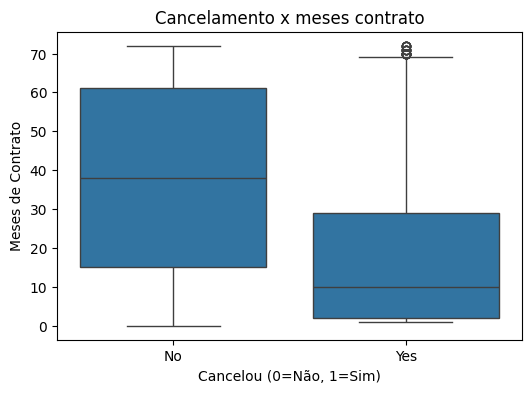

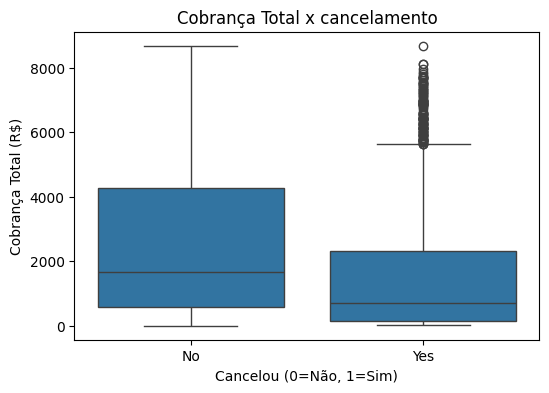

In [67]:

dados['Cobranca_Total'].replace('', '0', inplace=True)
dados['Cobranca_Total'].replace(' ', '0', inplace=True)
dados['Cobranca_Total'] = dados['Cobranca_Total'].astype(float)

plt.figure(figsize=(6,4))
sns.boxplot(x='Cancelou',
            y='Meses_Contrato',
            data=dados)
plt.xlabel("Cancelou (0=Não, 1=Sim)")
plt.ylabel("Meses de Contrato")
plt.title("Cancelamento x meses contrato")
plt.show()

plt.figure(figsize=(6,4))
sns.boxplot(x='Cancelou',
            y='Cobranca_Total',
            data=dados)
plt.xlabel("Cancelou (0=Não, 1=Sim)")
plt.ylabel("Cobrança Total (R$)")
plt.title("Cobrança Total x cancelamento")
plt.show()

##Regressão

### Regressão Logistica + Smote + Threshold

A Regressão Logística é um modelo de classificação binária que estima a probabilidade de ocorrência de um evento, com saída entre 0 e 1.
No contexto deste projeto, o modelo prevê a probabilidade de um cliente cancelar ou não cancelar o serviço. A decisão final é feita com base em um ponto de corte (threshold): se a probabilidade for maior ou igual ao threshold, o cliente é classificado como "cancelou"; caso contrário, "não cancelou".

Devido ao desbalanceamento entre as classes (Cancelou = 1 e Não Cancelou = 0), inicialmente foi utilizado o parâmetro class_weight='balanced', que já proporcionava bons resultados. No entanto, após alguns testes, foi definida uma distribuição de pesos personalizada, que resultou em melhorias nas métricas, especialmente no recall.

O melhor threshold foi identificado automaticamente por meio da biblioteca precision_recall_curve, que gera um gráfico comparando a precisão e o recall para diferentes pontos de corte. O valor ótimo foi selecionado com base no maior F1-score, conforme mostrado no gráfico a seguir.

In [68]:

# Melhor esquema identificado
pesos_custom1 = {0: 1.4, 1: 3.5}

# Instancia e treina com custom1
model = LogisticRegression(
    max_iter=1000,
    class_weight=pesos_custom1,
    random_state=42
)
# Modelo treinado com dados smotado.
model.fit(X_resample, y_resample)

# Probabilidade da classe “1” no teste já padronizado
y_proba = model.predict_proba(X_test_padronizado)[:, 1]

# Escolha do threshold
best_threshold = 0.915

# Previsão usando esse threshold em vez do .predict()
y_pred_thr = (y_proba >= best_threshold).astype(int)

# Ajusta y_test para 1-D, caso ainda seja coluna
y_test = y_test.squeeze()

# Métricas
print("Matriz de Confusão (threshold = %.3f):" % best_threshold)
print(confusion_matrix(y_test, y_pred_thr))

print("\nRelatório de Classificação:")
print(classification_report(
    y_test, y_pred_thr,
    target_names=['Não Cancelou', 'Cancelou']
))

auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC (invariável ao threshold): {auc:.3f}")


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Matriz de Confusão (threshold = 0.915):
[[1285  335]
 [ 175  386]]

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.88      0.79      0.83      1620
    Cancelou       0.54      0.69      0.60       561

    accuracy                           0.77      2181
   macro avg       0.71      0.74      0.72      2181
weighted avg       0.79      0.77      0.77      2181

AUC-ROC (invariável ao threshold): 0.818


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


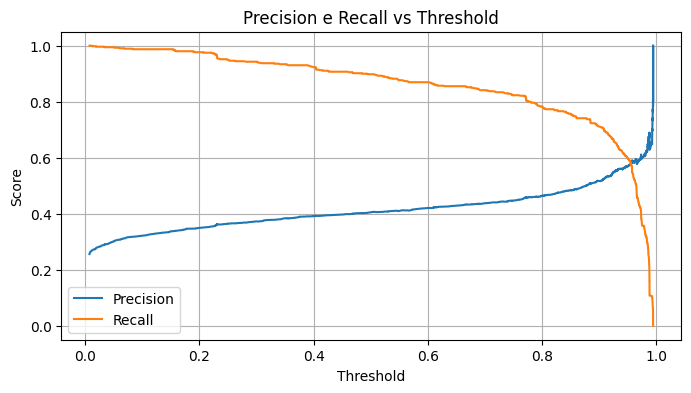

Melhor threshold (F1): 0.915
Precision: 0.536, Recall: 0.690, F1: 0.603

Relatório de Classificação com threshold ajustado:
              precision    recall  f1-score   support

Não Cancelou       0.88      0.79      0.83      1620
    Cancelou       0.54      0.69      0.60       561

    accuracy                           0.77      2181
   macro avg       0.71      0.74      0.72      2181
weighted avg       0.79      0.77      0.78      2181



In [69]:

# Precision, recall e thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Plot precision e recall vs threshold
plt.figure(figsize=(8,4))
plt.plot(thresholds, precisions[:-1], label='Precision')
plt.plot(thresholds, recalls[:-1], label='Recall')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Precision e Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Calcule F1 para cada threshold e identifique o melhor
f1_scores     = 2 * precisions * recalls / (precisions + recalls)
best_idx      = f1_scores.argmax()
best_threshold= thresholds[best_idx]
print(f"Melhor threshold (F1): {best_threshold:.3f}")
print(f"Precision: {precisions[best_idx]:.3f}, Recall: {recalls[best_idx]:.3f}, F1: {f1_scores[best_idx]:.3f}")

# Re-avalia com o threshold ajustado
y_pred_opt = (y_proba >= best_threshold).astype(int)
print("\nRelatório de Classificação com threshold ajustado:")
print(classification_report(y_test, y_pred_opt, target_names=['Não Cancelou','Cancelou']))

###Regressão Random Forest

O Random Forest é um modelo de classificação baseado em várias árvores de decisão. Ele funciona como uma “votação em grupo”, onde cada árvore dá sua opinião sobre a classe, e o modelo final escolhe a mais votada.

Como funciona:
O modelo cria centenas de árvores (neste projeto, 500), cada uma treinada em uma amostra diferente dos dados (com substituição).

Em cada divisão dentro das árvores, ele escolhe apenas um subconjunto aleatório de variáveis para decidir a melhor forma de separar os dados — isso ajuda a reduzir o viés e o overfitting.

Quando um novo cliente precisa ser classificado, cada árvore vota se ele vai ou não cancelar, e o modelo retorna a decisão com mais votos (classificação final).

In [70]:

# n_estimators = número de árvores na floresta
# max_depth    = profundidade máxima de cada árvore
# class_weight = utiliza a mesma proporção dos dados do regressão linear.
rf = RandomForestClassifier(
    n_estimators=500,
    max_depth=8,
    class_weight=pesos_custom1,
    random_state=42,
    n_jobs=-1            # usa todos os núcleos do processador
)

# Treinar o Random Forest no conjunto balanceado
rf.fit(X_resample, y_resample)

# Fazer previsões no conjunto de teste
#  - y_pred: rótulos (0 ou 1)
#  - y_proba: probabilidade de cada cliente pertencer à classe “1” (cancelou)
y_pred  = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

# Avaliar performance

# Matriz de confusão
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

# Relatório de classificação (precision, recall, f1)
print("\nRelatório de Classificação:")
print(classification_report(
    y_test, y_pred,
    target_names=['Não Cancelou','Cancelou']
))

# AUC-ROC
auc = roc_auc_score(y_test, y_proba)
print(f"AUC-ROC: {auc:.3f}")

/usr/local/lib/python3.11/dist-packages/sklearn/base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Matriz de Confusão:
[[1246  374]
 [ 137  424]]

Relatório de Classificação:
              precision    recall  f1-score   support

Não Cancelou       0.90      0.77      0.83      1620
    Cancelou       0.53      0.76      0.62       561

    accuracy                           0.77      2181
   macro avg       0.72      0.76      0.73      2181
weighted avg       0.81      0.77      0.78      2181

AUC-ROC: 0.843


##Avaliação dos modelos

####Qual modelo teve melhor desempenho?

O modelo Random Forest apresentou o melhor desempenho geral. Apesar de ter um precision levemente inferior (cerca de 1% a menos), seu recall foi aproximadamente 10% superior em relação à Regressão Logística.
Esse aumento no recall indica que o Random Forest conseguiu identificar uma maior proporção de clientes que realmente cancelaram o serviço, o que é especialmente relevante em problemas de cancelamento, onde identificar corretamente os casos positivos é mais importante do que apenas evitar falsos positivos.

####Overfitting ou Underfitting
Algum modelo apresentou overfitting ou underfitting?
Houve indícios de leve overfitting em ambos os modelos, especialmente devido ao desbalanceamento da variável alvo — havia uma predominância de clientes que não cancelaram, o que pode levar o modelo a favorecer a classe majoritária.

Para reduzir esse efeito, foi aplicado o SMOTE (Synthetic Minority Over-sampling Technique), que gerou dados sintéticos da classe minoritária até ela representar 40% do total da classe majoritária, usando 5 vizinhos próximos para criar exemplos semelhantes e realistas.

Além disso:

Na Regressão Logística, foi adotado um threshold ajustado (em vez do valor padrão 0.5) para melhorar o equilíbrio entre precisão e recall.

Também foi utilizado um peso de classe personalizado (class_weight) para reforçar a penalização dos erros na classe minoritária (cancelamentos), o que ajudou a melhorar o recall do modelo.

###BackLog - Análise de Importância das Variáveis

####Importância das Variáveis na Regressão Logistica

A Regressão Logística estima a log-odds (logaritmo da razão de chances) de um cliente cancelar o serviço com base nas variáveis de entrada. Cada variável recebe um coeficiente, que indica como ela influencia na probabilidade de cancelamento.

Um coeficiente positivo aumenta a chance de cancelamento.

Um coeficiente negativo reduz essa chance.

Quanto maior o valor absoluto do coeficiente, maior sua influência na decisão do modelo.

Essa interpretação torna o modelo mais transparente e útil para gerar insights de negócio, ao revelar quais fatores estão mais associados à evasão de clientes.

In [71]:
coeficientes = model.coef_[0]
nomes = X.columns

# Cria o DataFrame com nome e coeficiente
df_coef = pd.DataFrame({
    'Variável': nomes,
    'Coeficiente': coeficientes
})

# Ordena pelo valor do coeficiente (do menor para o maior)
df_coef = df_coef.sort_values(by='Coeficiente', ascending=False)

# Exibe a tabela ordenada
print(df_coef.to_string(index=False))

                      Variável  Coeficiente
         Internet Fibra Óptica     0.644786
Pagamento por Conta Eletrônica     0.509560
               Fatura em Papel     0.400731
                         Idoso     0.279097
 Pagamento Automático (Cartão)     0.047345
                Cobranca_Total     0.000332
             Meses de Contrato    -0.053605
                   Tem Cônjuge    -0.067827
               Tem Dependentes    -0.151369
          Tem Segurança Online    -0.334257
           Tem Suporte Técnico    -0.348387
             Contrato de 1 Ano    -0.684105
                  Sem Internet    -1.001547
            Contrato de 2 Anos    -1.320580


####Importância das Variáveis no Random Forest
O modelo Random Forest permite avaliar quais variáveis mais contribuíram para a tomada de decisão durante o treinamento.

Isso é feito por meio do atributo feature_importances_, que calcula, para cada variável, o quanto ela ajudou a reduzir a impureza (Gini ou entropia) nos nós de decisão, ao longo de todas as árvores da floresta.

Em resumo:

Cada vez que uma variável é usada para dividir os dados em uma árvore, o modelo calcula quanto essa divisão melhorou a separação entre as classes.

Esses ganhos de separação (redução de impureza) são acumulados para cada variável.

No final, os valores são normalizados para ficar entre 0 e 1, resultando na métrica de importância de cada feature.

Esse processo ajuda a identificar quais variáveis foram mais relevantes para prever o cancelamento dos clientes.

In [72]:
nomes = X.columns

# Extrai importâncias
importancias = rf.feature_importances_

# Monta um DataFrame ordenado
df_imp = (
    pd.DataFrame({'feature': nomes, 'importance': importancias})
      .sort_values('importance', ascending=False)
      .reset_index(drop=True)
)

print(df_imp)


                           feature  importance
0                Meses de Contrato    0.184204
1               Contrato de 2 Anos    0.143200
2            Internet Fibra Óptica    0.137316
3                   Cobranca_Total    0.135787
4   Pagamento por Conta Eletrônica    0.109946
5                     Sem Internet    0.061819
6                Contrato de 1 Ano    0.059951
7                  Fatura em Papel    0.043507
8             Tem Segurança Online    0.032829
9              Tem Suporte Técnico    0.030636
10                 Tem Dependentes    0.018727
11                           Idoso    0.017298
12                     Tem Cônjuge    0.014504
13   Pagamento Automático (Cartão)    0.010277


### Conclusões e Recomendações
####Principais fatores que influenciam a evasão

| Fator                              | Efeito no cancelamento                                 | Evidência                                     |
| ---------------------------------- | ----------------------------------------------- | --------------------------------------------- |
| **Meses de Contrato**              | Menor tenure → maior probabilidade de canc.     | RF: importância 18 %; RL: coeficiente \–0,054 |
| **Contrato de 2 Anos**             | Protege fortemente contra canc.                 | RF: 14 %; RL: coeficiente \–1,321             |
| **Internet Fibra Óptica**          | Aumenta moderadamente o canc.                   | RF: 13,7 %; RL: coeficiente +0,645            |
| **Cobrança Total**                 | Clientes com baixo gasto acumulado canc. mais   | RF: 13,6 %; RL: coeficiente ≈0                |
| **Pagamento por Conta Eletrônica** | Leva a um pequeno aumento no canc.              | RF: 11 %; RL: coeficiente +0,510              |

Observação: RL = Regressão Logística; RF = Random Forest.



####Desempenho dos Modelos
- Random Forest foi o melhor classificador, com AUC-ROC 0.843 e recall de 0.76 (vs. 0.818 e 0.69 na RL).

- Regressão Logística é mais interpretável, mas subestima cancelamentos em casos não lineares.


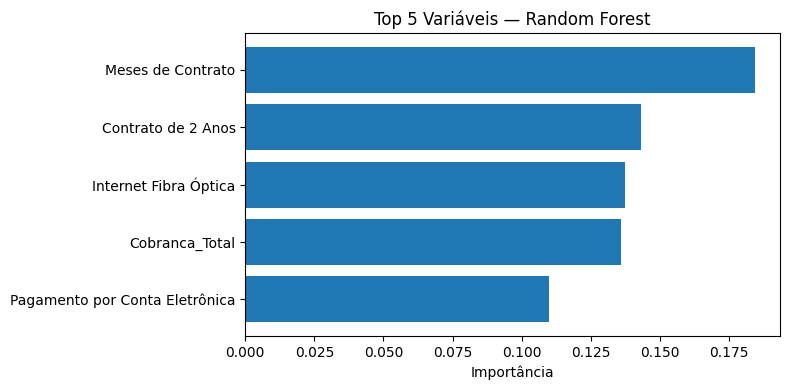

In [73]:

# Recria o DataFrame de importâncias
feat_imp = pd.DataFrame({
    'feature': X_train.columns,
    'importance': rf.feature_importances_
})

# Seleciona as top 5 mais importantes
top5 = feat_imp.sort_values('importance', ascending=True).tail(5)

# Plota em horizontal
plt.figure(figsize=(8, 4))
plt.barh(top5['feature'], top5['importance'])
plt.xlabel('Importância')
plt.title('Top 5 Variáveis — Random Forest')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


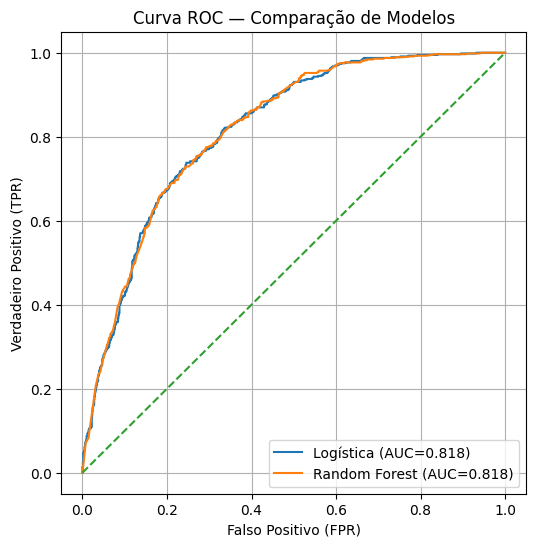

In [74]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
# Probabilidades de cada modelo
y_proba_lr = model.predict_proba(X_test_padronizado)[:, 1]
y_proba_rf = rf.predict_proba(  X_test_padronizado)[:, 1]

# Calcula FPR/TPR e AUC
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
auc_lr = auc(fpr_lr, tpr_lr)
auc_rf = auc(fpr_rf, tpr_rf)

# Plota as duas curvas
plt.figure(figsize=(6,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logística (AUC={auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC={auc_rf:.3f})')
plt.plot([0,1], [0,1], linestyle='--')  # baseline
plt.xlabel('Falso Positivo (FPR)')
plt.ylabel('Verdadeiro Positivo (TPR)')
plt.title('Curva ROC — Comparação de Modelos')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


####Estratégias de retenção sugeridas
Foco no onboarding nos 3 primeiros meses

- Oferecer tutoriais, descontos progressivos ou brindes para clientes recém-contratados. ***Meta***: diminuir cancelamento elevado em tenure < 6 meses.

- Descontos ou benefícios (upgrade de plano, pontos de fidelidade) para quem optar por 2 anos. ***Base***: “Contrato de 2 Anos” reduz fortemente o cancelamento.

- Monitorar performance de rede e criar atendimento prioritário.

- Programas de feedback rápido para reduzir insatisfação.

- Ofertas de pacotes combinados (TV, streaming, suporte técnico) para aumentar o “lifetime value”.

- Incentivar upgrades de plano conforme uso.

- Destacar as vantagens do pagamento automático por cartão ou conta eletrônica (menor cancelamento que boleto).

- Notificações de vencimento e facilidades de parcelamento.